Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         2965 non-null   float64
 1   limit_balance               2965 non-null   float64
 2   sex                         2965 non-null   object 
 3   education_level             2965 non-null   object 
 4   marital_status              2965 non-null   object 
 5   pay_0                       2965 non-null   float64
 6   bill_amt_1                  2965 non-null   float64
 7   pay_amt_1                   2965 non-null   float64
 8   default_payment_next_month  2965 non-null   object 
dtypes: float64(5), object(4)
memory usage: 208.6+ KB
None

DataFrame - First 5 rows:
    age  limit_balance sex education_level marital_status  pay_0  bill_amt_1  \
0  54.0        80000.0   1               6              1    0.0     61454.0   
1  49.0

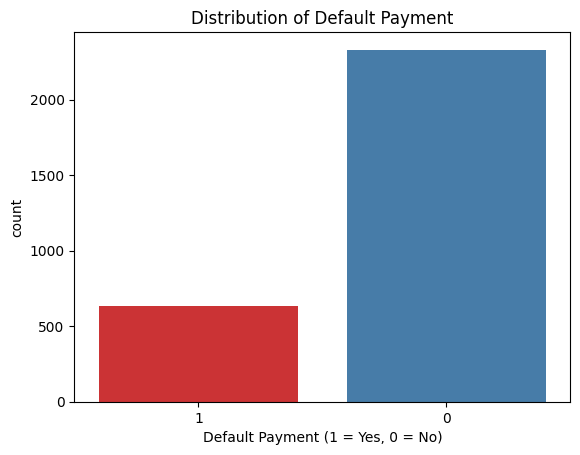

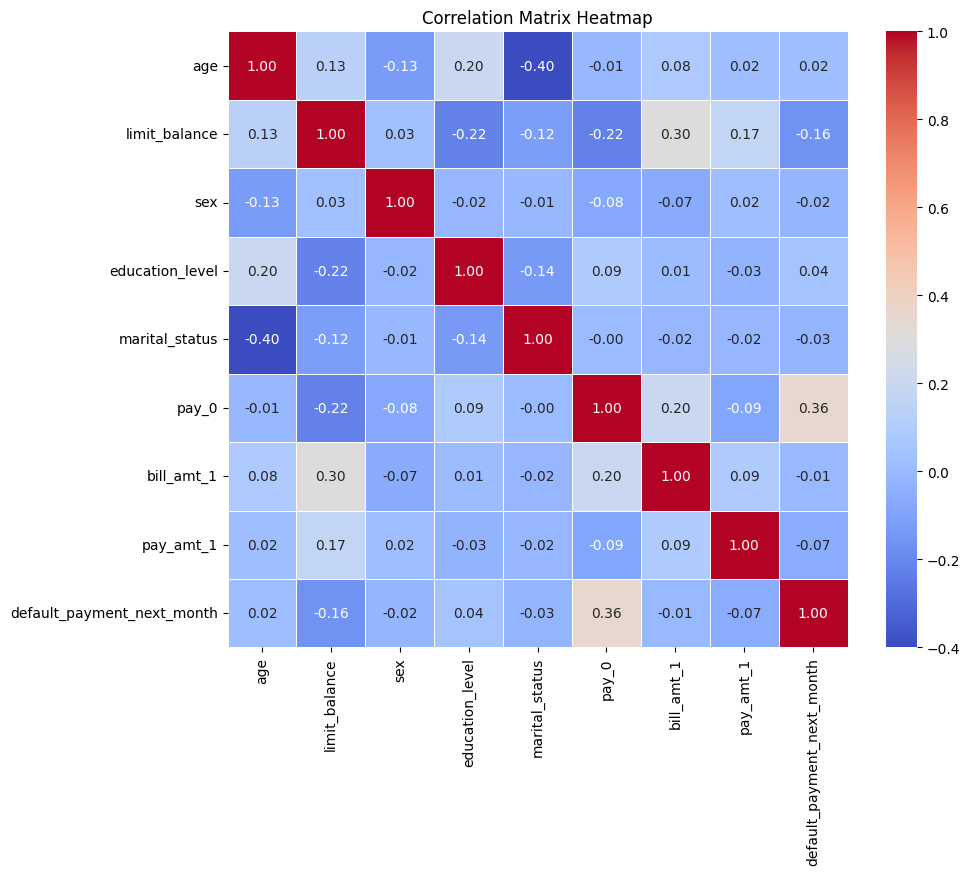

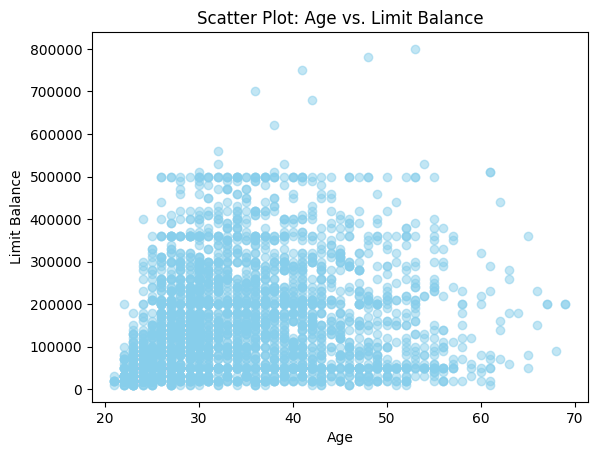

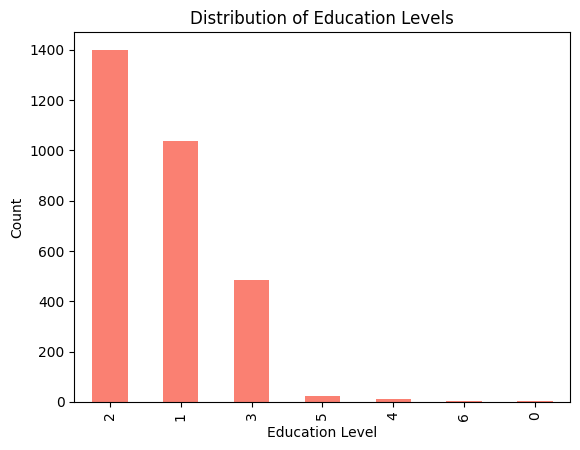

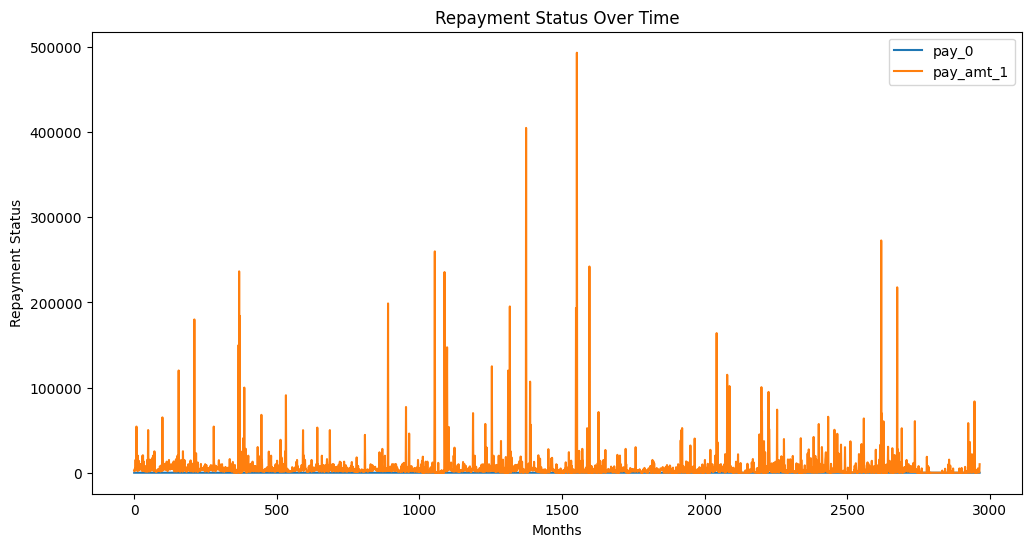

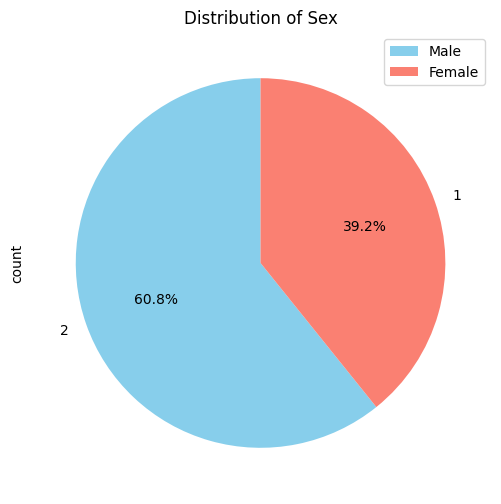

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Initialize a BigQuery client
client = bigquery.Client()

# Function to load data from BigQuery
def load_data():
    """
    Fetches credit card default dataset from BigQuery and converts it into a pandas DataFrame.

    Returns:
    pandas.DataFrame: Credit card default dataset.
    """
    # SQL query to select specific columns from the dataset
    query = """
    SELECT
      age,
      limit_balance,
      sex,
      education_level,
      marital_status,
      pay_0,
      bill_amt_1,
      pay_amt_1,
      default_payment_next_month
    FROM
      `bigquery-public-data.ml_datasets.credit_card_default`
    """
    # Execute the query and convert the result to a DataFrame
    return client.query(query).to_dataframe()

# Function to display basic information about the dataset
def display_dataset_info(data):
    """
    Prints basic information about the dataset, including column names, data types, and non-null counts.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    print("Dataset Info:")
    # Display information about the DataFrame, such as column names and data types
    print(data.info())

# Function to display the first 5 and last 5 rows of data in the DataFrame
def display_dataframe(data):
    """
    Displays the first 5 and last 5 rows of the DataFrame.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    print("\nDataFrame - First 5 rows:")
    # Display the first 5 rows of the DataFrame
    print(data.head())

    print("\nDataFrame - Last 5 rows:")
    # Display the last 5 rows of the DataFrame
    print(data.tail())

# Function to visualize the distribution of default payments
def visualize_default_distribution(data):
    """
    Creates and displays a count plot to visualize the distribution of default payments.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    # Create a count plot using seaborn
    sns.countplot(x='default_payment_next_month', data=data, palette='Set1')
    # Set plot title and labels
    plt.title('Distribution of Default Payment')
    plt.xlabel('Default Payment (1 = Yes, 0 = No)')
    # Display the plot
    plt.show()
    
#--- NEW VISULISATIONS ---#

# Function to create a correlation matrix heatmap
def visualize_correlation_heatmap(data):
    if len(data) > 0:
        # Correlation matrix heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix Heatmap')
        plt.show()
    else:
        print("No data available for correlation heatmap.")

def visualize_scatter_plot(data):
    """
    Creates and displays a scatter plot to visualize the relationship between Age and Limit Balance.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    # Create a scatter plot using matplotlib
    plt.scatter(data['age'], data['limit_balance'], color='skyblue', alpha=0.5)

    # Set plot title and labels
    plt.title('Scatter Plot: Age vs. Limit Balance')
    plt.xlabel('Age')
    plt.ylabel('Limit Balance')

    # Display the plot
    plt.show()

def visualize_bar_chart(data):
    """
    Creates and displays a bar chart to visualize the distribution of Education Levels.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    # Create a bar chart using matplotlib
    data['education_level'].value_counts().plot(kind='bar', color='salmon')

    # Set plot title and labels
    plt.title('Distribution of Education Levels')
    plt.xlabel('Education Level')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

def visualize_line_plot(data):
    """
    Creates and displays a line plot to visualize the trend of repayment status over time.

    Args:
    data (pandas.DataFrame): Credit card default dataset.
    """
    # Filter columns starting with 'pay_' to get repayment columns dynamically
    repayment_columns = [col for col in data.columns if col.startswith('pay_')]

    # Check if there are any repayment columns
    if repayment_columns:
        # Create a line plot using matplotlib
        data[repayment_columns].plot(kind='line', figsize=(12, 6))

        # Set plot title and labels
        plt.title('Repayment Status Over Time')
        plt.xlabel('Months')
        plt.ylabel('Repayment Status')

        # Display the plot
        plt.show()
    else:
        print("No repayment columns found in the DataFrame.")

# Function to create a pie chart for the distribution of sex
def visualize_pie_chart(data):
    if len(data) > 0:
        # Pie chart for distribution of sex
        plt.figure(figsize=(8, 6))
        data['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
        plt.title('Distribution of Sex')
        plt.legend(labels=['Male', 'Female'])
        plt.show()
    else:
        print("No data available for pie chart.")

#--- END ---#

# Load the data
credit_data = load_data()

# Apply functions
display_dataset_info(credit_data)
display_dataframe(credit_data)
visualize_default_distribution(credit_data)
visualize_correlation_heatmap(credit_data)
visualize_scatter_plot(credit_data)
visualize_bar_chart(credit_data)
visualize_line_plot(credit_data)
visualize_pie_chart(credit_data)